In [1]:
##############################################################################
## EE559 Final Project ===> Mushroom Classification.
## Created by Sudesh Kumar Santhosh Kumar and Thejesh Chandar Rao.
## Date: 6th May, 2023
## Tested in Python 3.10.9 using conda environment version 22.9.0.
##############################################################################

# Final Project -> Classification of Mushrooms (EE - 559)

## Feature Engineering and Data Cleansing

# Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Loading the dataset v1 from Encoding Directory which has the Encoded Features. (Every feature is numerical)

In [3]:
train_data = pd.read_csv("./dataset/Encoded/mushroom_train_v1.csv")
print("Train Data Encoded-> 1: ")
train_data.head()


Train Data Encoded-> 1: 


,cap-diameter,stem-height,stem-width,cap-shape_cap-diameter_mean,cap-shape_cap-diameter_min,cap-shape_cap-diameter_max,cap-shape_cap-diameter_median,cap-shape_stem-height_mean,cap-shape_stem-height_min,cap-shape_stem-height_max,...,season_cap-diameter_median,season_stem-height_mean,season_stem-height_min,season_stem-height_max,season_stem-height_median,season_stem-width_mean,season_stem-width_min,season_stem-width_max,season_stem-width_median,class
0,4.98,6.04,6.21,3.781002,0.55,7.89,4.25,6.411460,2.24,15.07,...,6.06,6.666083,0.0,33.92,6.01,12.087907,0.0,101.69,10.66,p
1,2.84,5.66,3.55,6.671073,0.38,30.48,6.27,6.849409,1.20,24.63,...,5.63,6.613699,0.0,33.03,5.91,11.871272,0.0,103.91,9.33,p
2,11.44,7.03,25.29,6.671073,0.38,30.48,6.27,6.849409,1.20,24.63,...,6.54,6.428729,0.0,27.36,6.02,13.801794,0.0,70.02,10.89,e
3,8.77,4.44,13.61,7.477626,1.03,25.60,6.83,5.541955,1.92,11.50,...,6.06,6.666083,0.0,33.92,6.01,12.087907,0.0,101.69,10.66,p
4,7.55,8.41,18.44,6.671073,0.38,30.48,6.27,6.849409,1.20,24.63,...,6.06,6.666083,0.0,33.92,6.01,12.087907,0.0,101.69,10.66,e


## Separating Input Features and class labels from the dataset. Also Encoding the class labels from "p" -> 1 and "e" -> 0

In [4]:
X_train = train_data.drop('class', axis=1)  # Select all the features except labels,
y_train = train_data['class']  # Select only the 'class' column.

class_map = {"e" : 0, "p" : 1}
y_train_enc = y_train.map(class_map)

In [5]:
categoricalFeatures = [col for col in X_train.columns if X_train[col].dtype == "object"]
numericalFeatures = [col for col in X_train.columns if X_train[col].dtype == "float64"]

classes, class_index, class_count = np.unique(y_train, return_index=True, return_counts=True, axis=None)

### Checking the Dataset for Categorical Features

In [6]:
print(f"Categorical Features: {categoricalFeatures}")
print(f"Numerical Features: {numericalFeatures}")
print(f"Total number of Categorical Features: {len(categoricalFeatures)}")
print(f"Total number of Numerical Features: {len(numericalFeatures)}")


Categorical Features: []
Numerical Features: ['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_cap-diameter_mean', 'cap-shape_cap-diameter_min', 'cap-shape_cap-diameter_max', 'cap-shape_cap-diameter_median', 'cap-shape_stem-height_mean', 'cap-shape_stem-height_min', 'cap-shape_stem-height_max', 'cap-shape_stem-height_median', 'cap-shape_stem-width_mean', 'cap-shape_stem-width_min', 'cap-shape_stem-width_max', 'cap-shape_stem-width_median', 'cap-surface_cap-diameter_mean', 'cap-surface_cap-diameter_min', 'cap-surface_cap-diameter_max', 'cap-surface_cap-diameter_median', 'cap-surface_stem-height_mean', 'cap-surface_stem-height_min', 'cap-surface_stem-height_max', 'cap-surface_stem-height_median', 'cap-surface_stem-width_mean', 'cap-surface_stem-width_min', 'cap-surface_stem-width_max', 'cap-surface_stem-width_median', 'cap-color_cap-diameter_mean', 'cap-color_cap-diameter_min', 'cap-color_cap-diameter_max', 'cap-color_cap-diameter_median', 'cap-color_stem-height_mean', 'cap-color_

### Computing the Cross-Correlation co-efficent between Features & Y_train and plotting the absolute values of pearson's co-efficent

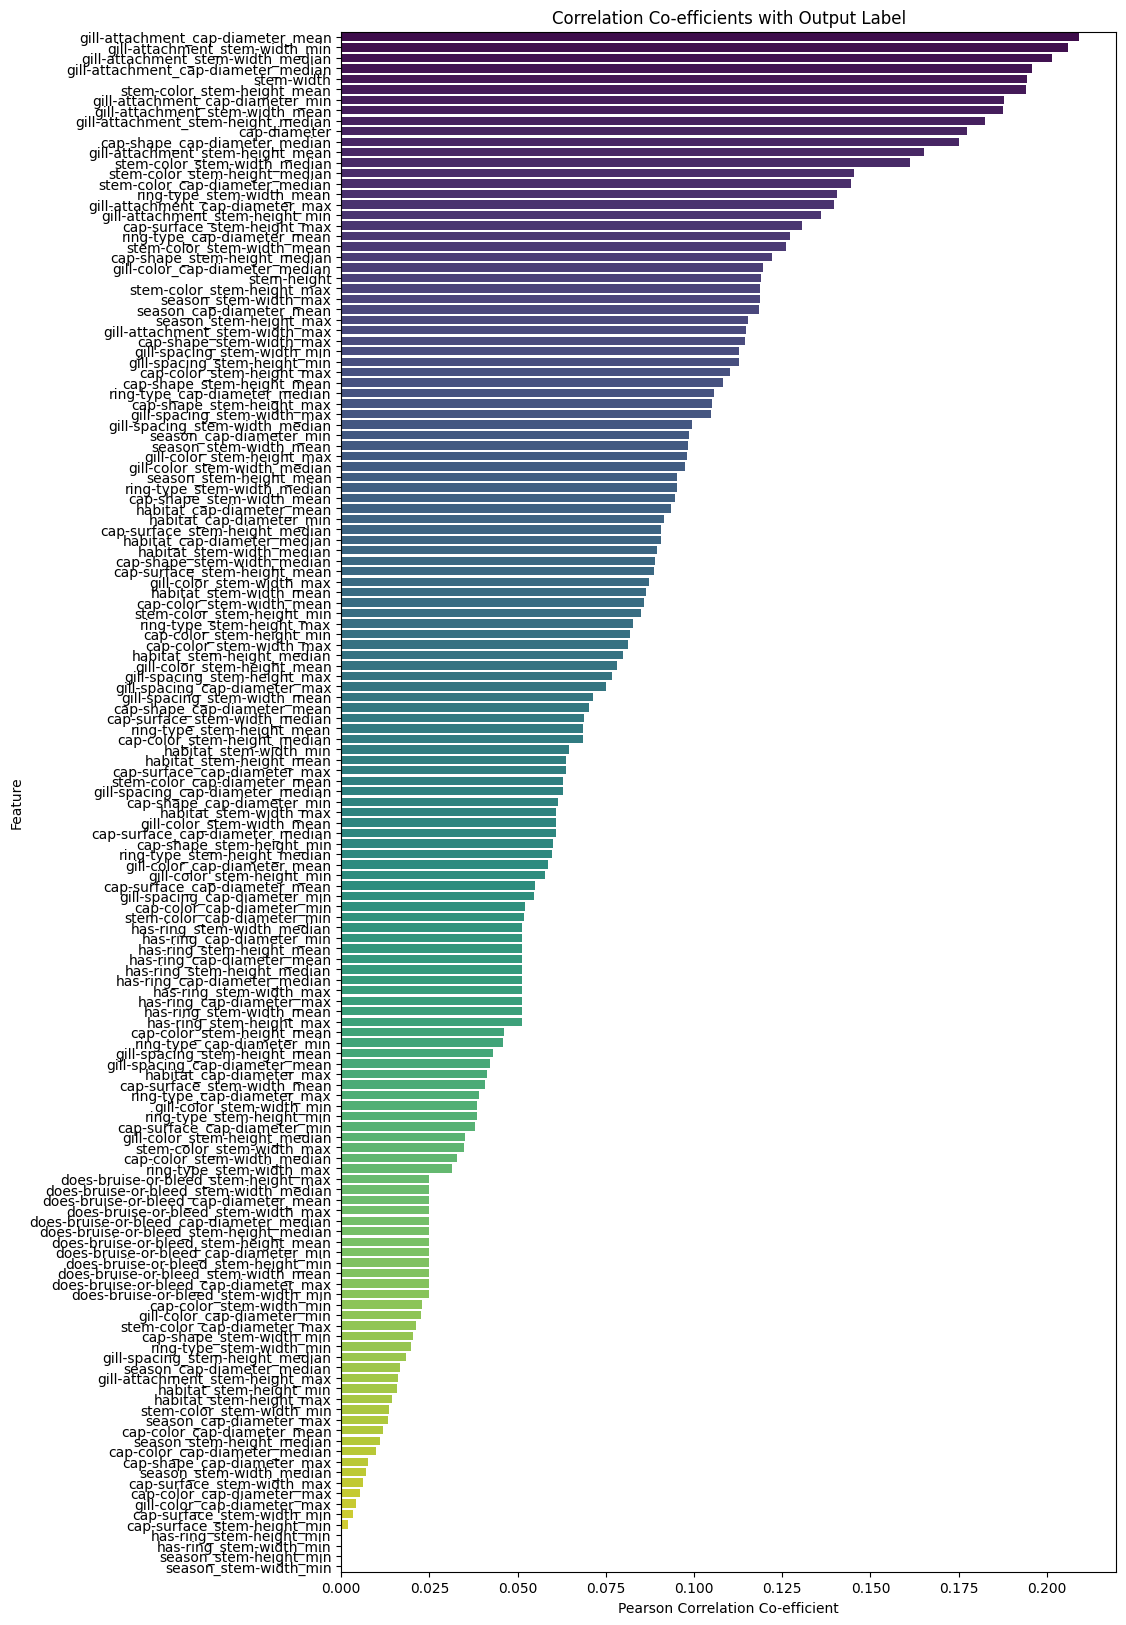

In [7]:
# Calculate Pearson correlations between all features and output label
correlations = X_train.corrwith(y_train_enc, method='pearson')

# Sort the correlations by absolute value
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Create the bar chart using seaborn
plt.figure(figsize=(10, 20))
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='viridis')
plt.xlabel('Pearson Correlation Co-efficient')
plt.ylabel('Feature')
plt.title('Correlation Co-efficients with Output Label')
plt.show()


### Considering the top features which have a threhold value of Pearson's co-efficient > threshold from a list thresholds

In [8]:
thresholds = [0.100, 0.125, 0.150, 0.175, 0.200]

for (i, threshold) in enumerate(thresholds):
    # Select the features with correlation coefficient greater than the threshold
    top_features = correlations_sorted[correlations_sorted > threshold].index.tolist()

    X_train_top_pearson = X_train[top_features]

    train_data_top_pearson = pd.concat([X_train_top_pearson, y_train_enc], axis=1)

    print(f"Pearson Co-efficient Technique version: {i+1} & Threshold value: {threshold}")
    print(f"Shape of Training Data after performing Feature Selection using Correlation: {train_data_top_pearson.shape}")
    print(f"Number of Features before performing Feature Selection using Correlation: {train_data.shape[1] - 1} features")
    print(f"Number of Features after performing Feature Selection using Correlation: {train_data_top_pearson.shape[1] - 1} features")
    print()

    ### Converting the data-frame with 37 features to csv file to perform Feature Transformation. (Saving this as v1)
    train_data_top_pearson.to_csv(f"./dataset/FeatureSelected/Pearson/mushroom_train_v{i+1}.csv", index=False)




Pearson Co-efficient Technique version: 1 & Threshold value: 0.1
Shape of Training Data after performing Feature Selection using Correlation: (42660, 38)
Number of Features before performing Feature Selection using Correlation: 147 features
Number of Features after performing Feature Selection using Correlation: 37 features

Pearson Co-efficient Technique version: 2 & Threshold value: 0.125
Shape of Training Data after performing Feature Selection using Correlation: (42660, 22)
Number of Features before performing Feature Selection using Correlation: 147 features
Number of Features after performing Feature Selection using Correlation: 21 features

Pearson Co-efficient Technique version: 3 & Threshold value: 0.15
Shape of Training Data after performing Feature Selection using Correlation: (42660, 14)
Number of Features before performing Feature Selection using Correlation: 147 features
Number of Features after performing Feature Selection using Correlation: 13 features

Pearson Co-effic

## Use the D' number of features from the D = 147 features by training a simple linear model.

In [9]:
# Create an empty list to store the performance of each feature
feature_performances_linear = []

# Loop over all features in X_train
for feature in X_train.columns:
    
    # Create a new instance of the logistic regression model
    model = LogisticRegression(random_state=42)
    
    # Fit the model using the current feature only
    model.fit(X_train[[feature]], y_train)
    
    # Make predictions using the current feature only
    y_pred = model.predict(X_train[[feature]])
    
    # Calculate the accuracy of the model using the current feature only
    accuracy = accuracy_score(y_train, y_pred)
    
    # Store the performance of the current feature
    feature_performances_linear.append((feature, accuracy))

# Sort the features by their performance (accuracy)
feature_performances_linear = sorted(feature_performances_linear, key=lambda x: x[1], reverse=True)

In [10]:
d_primes_linear = [12, 8, 4, 2]

for i, d_prime in enumerate(d_primes_linear):
    top_features_linear = [x[0] for x in feature_performances_linear[:d_prime]]

    X_train_top_linear = X_train[top_features_linear]

    train_data_top_linear = pd.concat([X_train_top_linear, y_train_enc], axis=1)

    print(f"Linear Model Technique version: {i+1} & d_prime: {d_prime}")
    print(f"Shape of Training Data after performing Feature Selection using Linear Model: {train_data_top_linear.shape}")
    print(f"Number of Features before performing Feature Selection using Linear Model: {train_data.shape[1] - 1} features")
    print(f"Number of Features after performing Feature Selection using Linear Model: {train_data_top_linear.shape[1] - 1} features")
    print()

    ### Converting the data-frame with 37 features to csv file to perform Feature Transformation. (Saving this as v1)
    train_data_top_linear.to_csv(f"./dataset/FeatureSelected/LinearRegression/mushroom_train_v{i+1}.csv", index=False)

Linear Model Technique version: 1 & d_prime: 12
Shape of Training Data after performing Feature Selection using Linear Model: (42660, 13)
Number of Features before performing Feature Selection using Linear Model: 147 features
Number of Features after performing Feature Selection using Linear Model: 12 features

Linear Model Technique version: 2 & d_prime: 8
Shape of Training Data after performing Feature Selection using Linear Model: (42660, 9)
Number of Features before performing Feature Selection using Linear Model: 147 features
Number of Features after performing Feature Selection using Linear Model: 8 features

Linear Model Technique version: 3 & d_prime: 4
Shape of Training Data after performing Feature Selection using Linear Model: (42660, 5)
Number of Features before performing Feature Selection using Linear Model: 147 features
Number of Features after performing Feature Selection using Linear Model: 4 features

Linear Model Technique version: 4 & d_prime: 2
Shape of Training Da

## 